# 1- Installer et importer les dépendences

In [7]:
#installer pytorch
!pip install torch torchvision torchaudio

In [1]:
#installer easyocr
!pip install easyocr

In [2]:
pip install ArabicOcr

Note: you may need to restart the kernel to use updated packages.


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from ArabicOcr import arabicocr

# 2- Lire les images

In [17]:
#from an URL
#IMAGE_PATH = 'https://lemag.digitools.io/wp-content/uploads/2016/03/BigData-et-cloud-computing-cover-768x432.png'

In [34]:
#image locale
IMAGE_PATH1 = 'bd.png'

# 3- Extraire le texte de l'image

In [28]:
#Détection de texte anglais
reader1 = easyocr.Reader(['en'], gpu=False)
result1 = reader1.readtext(IMAGE_PATH1,paragraph="False")
result1

Using CPU. Note: This module is much faster with a GPU.


[[[[539, 347], [1033, 347], [1033, 455], [539, 455]], 'BIG DATA']]

In [6]:
#Détection de texte arabe
# Changer le chemin vers l'image
IMAGE_PATH2 = 'arabiya.jfif'
# Meme code on change juste l'attribut ['en'] à ['ar']
reader2 = easyocr.Reader(['ar'], gpu=False)
result2 = reader2.readtext(IMAGE_PATH2,paragraph="False")
result2

Using CPU. Note: This module is much faster with a GPU.


[[[[67, 24], [245, 24], [245, 124], [67, 124]], 'العربية']]

# 4- Résultats de dessin pour le texte d'une seule ligne

In [37]:
#Exemple 1 : texte anglais
top_left_eng1 = tuple(result1[0][0][0])
bottom_right_eng1 = tuple(result1[0][0][2])
text_eng1 = result1[0][1]
font_eng1 = cv2.FONT_HERSHEY_SIMPLEX

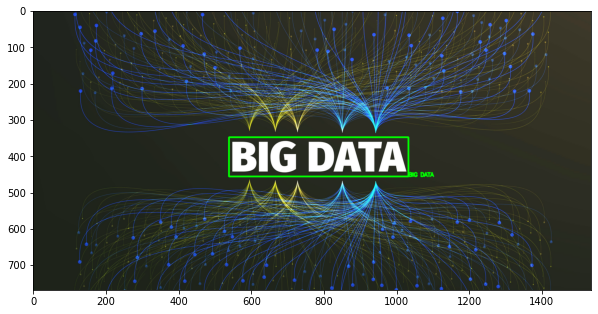

In [38]:
img_eng1 = cv2.imread(IMAGE_PATH1)
img_eng1 = cv2.rectangle(img_eng1,top_left_eng1,bottom_right_eng1,(0,255,0),3)
img_eng1 = cv2.putText(img_eng1,text_eng1,bottom_right_eng1, font_eng1, 0.5,(0,255,0),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img_eng1)
plt.show()

In [17]:
#Exemple 2 : Texte Arabe
out_image='out.jpg'
results=arabicocr.arabic_ocr(IMAGE_PATH2,out_image)
text = result2[0][1]
#écrire le texte détécté dans un fichier .txt
with open ('file1.txt','w',encoding='utf-8')as myfile:
        myfile.write(str(text))

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.9673: العربية


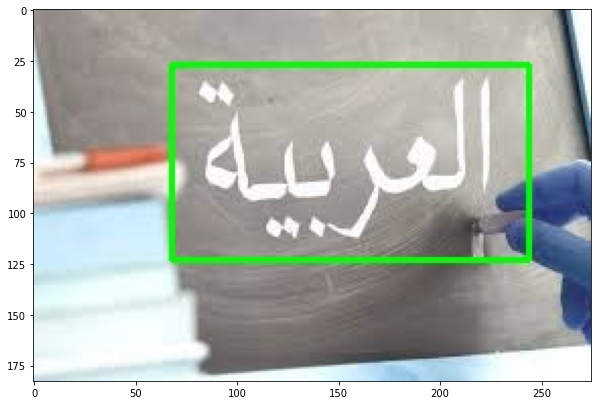

In [19]:
img = cv2.imread('out.jpg', cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [54]:
#Exemple 3 : texte anglais
IMAGE_PATH = 'plant.jpg'
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[110, 496], [653, 496], [653, 545], [110, 545]],
  'WHEREVER LIFE PLANTS YOU,',
  0.9860543985182165),
 ([[187, 551], [575, 551], [575, 591], [187, 591]],
  'BLOOM WITH GRACE',
  0.9797812545845807)]

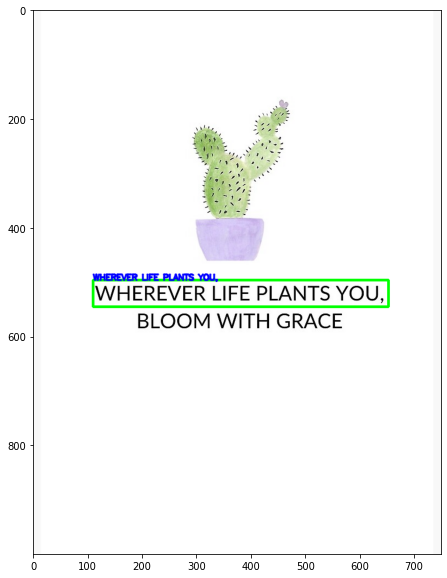

In [55]:
#obtenir les coordonnées
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
#Dessiner le texte et les cadres de délimitation
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(0,0,255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [53]:
#Et si nous voulions voir la détection de tout le texte dans une image elle-même ?

# 5- Gérer plusieurs lignes 

In [62]:
#Texte Anglais
img_eng_mp = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img_eng_mp = cv2.rectangle(img_eng_mp,top_left,bottom_right,(0,255,0),3)
    img_eng_mp = cv2.putText(img_eng_mp,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

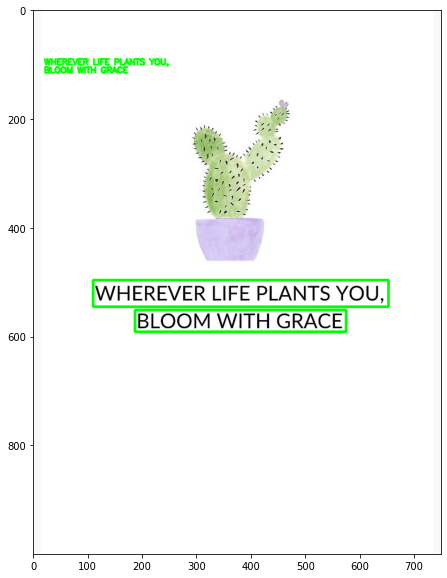

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(img_eng_mp)
plt.show()

In [12]:
#Texte Arabe
image_path='arabic.jpeg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):
        word=results[i][1]
        words.append(word)
with open ('file2.txt','w',encoding='utf-8')as myfile:
        myfile.write(str(words))

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.9724: فلسفة الصمت في
[INFO] 0.5558: كسب محاسن الكلام
[[[[134, 504], [588, 504], [588, 602], [134, 602]], 'فلسفة الصمت في', 0.9723943724039924], [[[70, 653], [644, 653], [644, 755], [70, 755]], 'كسب محاسن الكلام', 0.5557658341264174]]


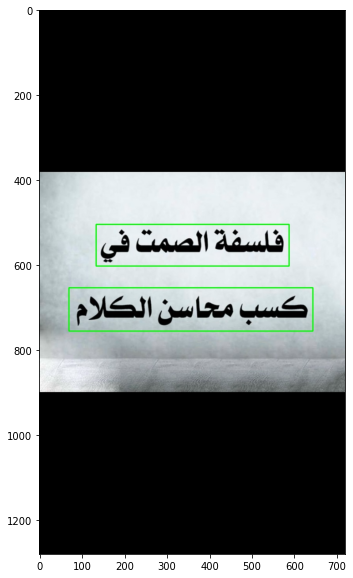

In [4]:
img = cv2.imread('out.jpg', cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()